<div align="center">
<h1>RoboAnalyzer Lab Assignment</h1>
<h5>Prasanth Kota -- IIT2019062
</div>

1. Perform the inverse kinematics of a 2R robot of any DH parameter combination, visualize the joint parameters and end effector positions (attach screenshots). Download joint value versus end effector position file from roboanalyzer. Deduce an analytical solution (Python or Matlab) and verify it using downloaded file.

- Inverse kinematics of a 2R Robot


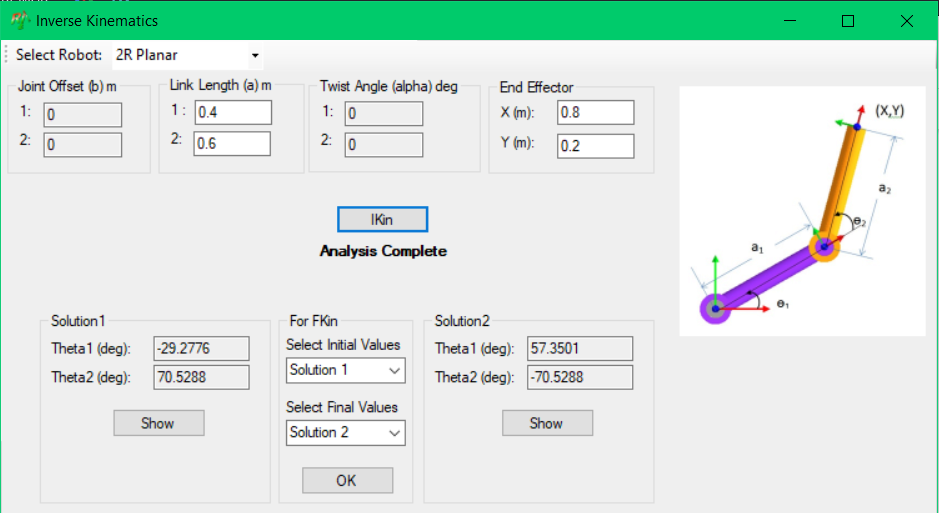

- Visualizing the Joint Parameters and End Effector  Positions

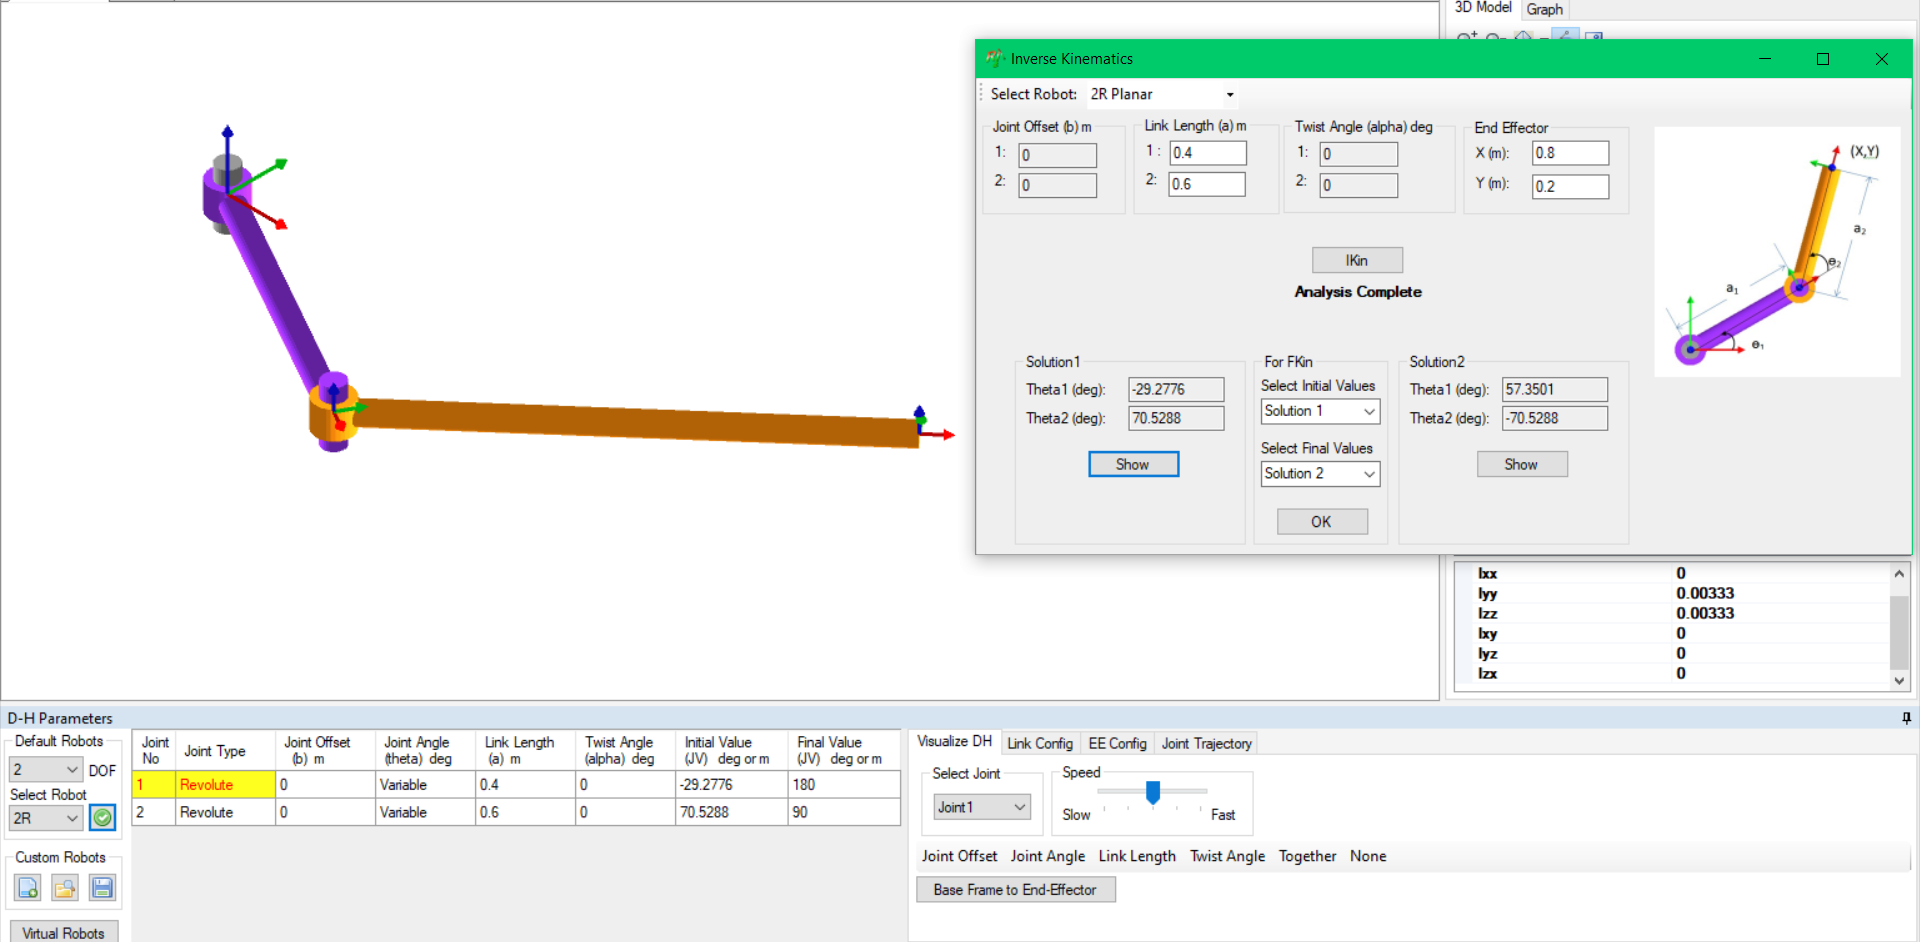

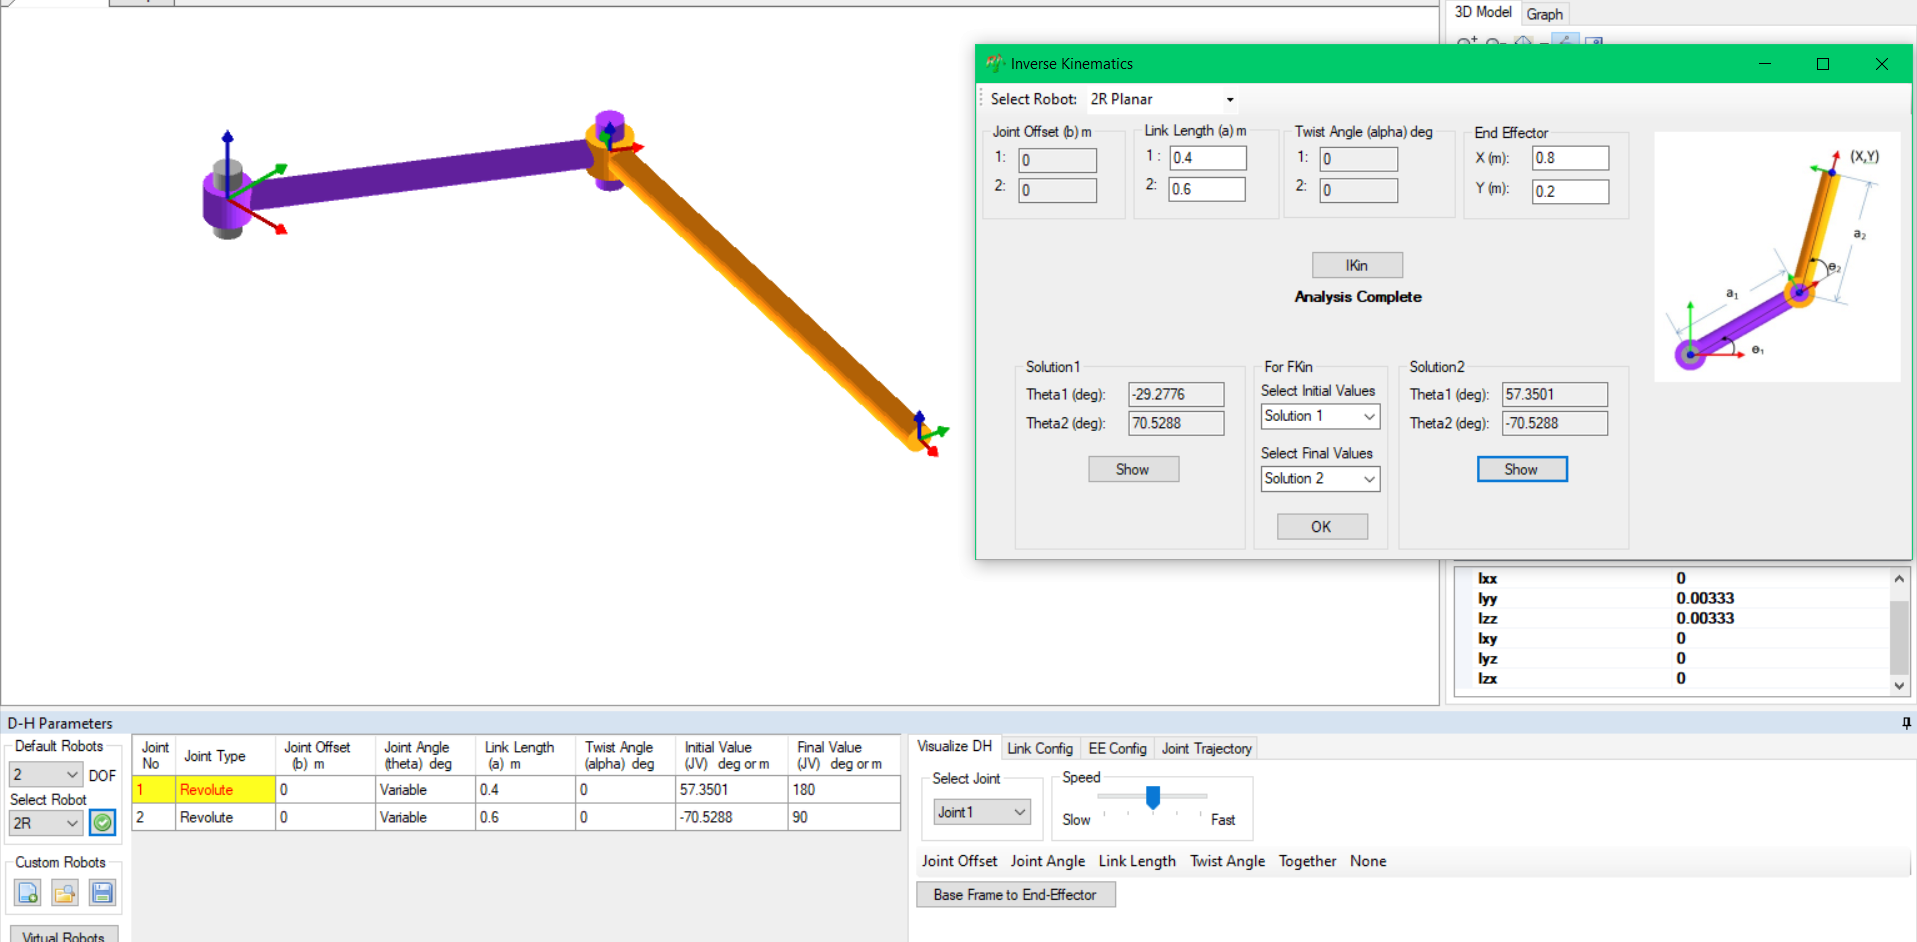

- End Effector Position 

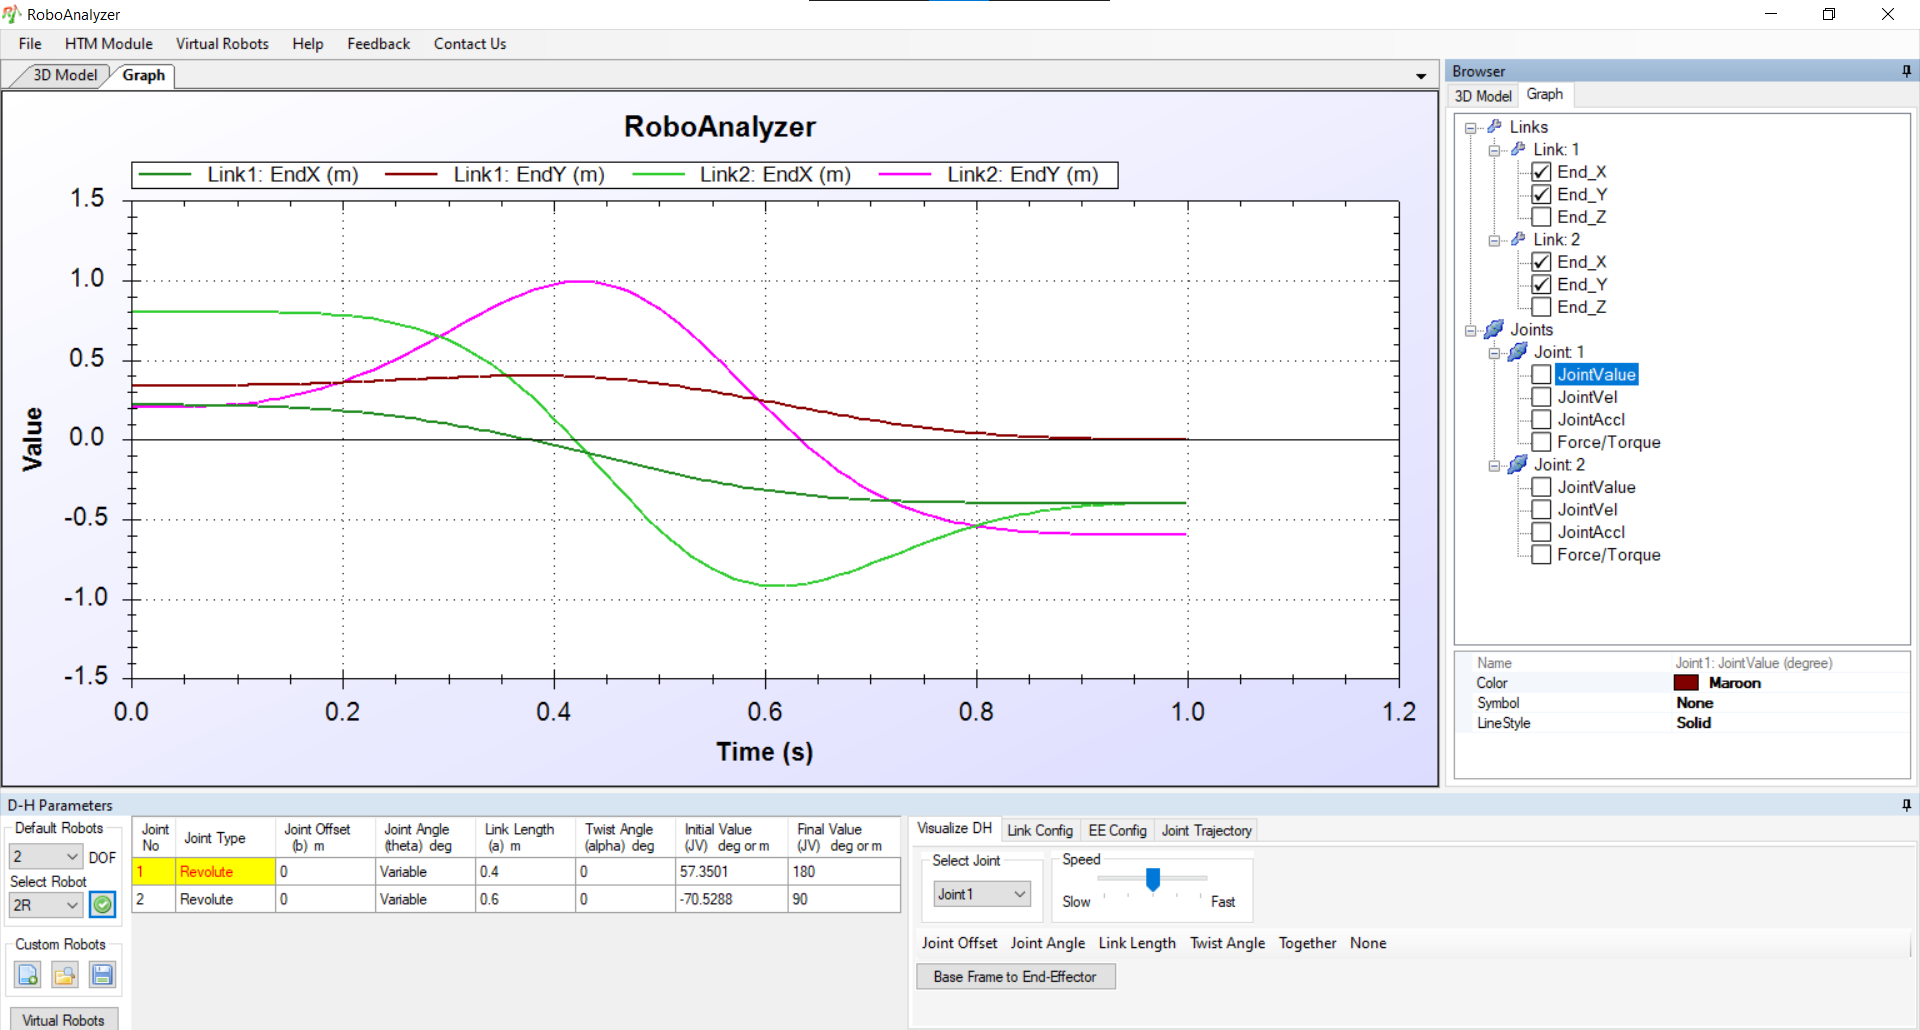

- joint value vs End effector position

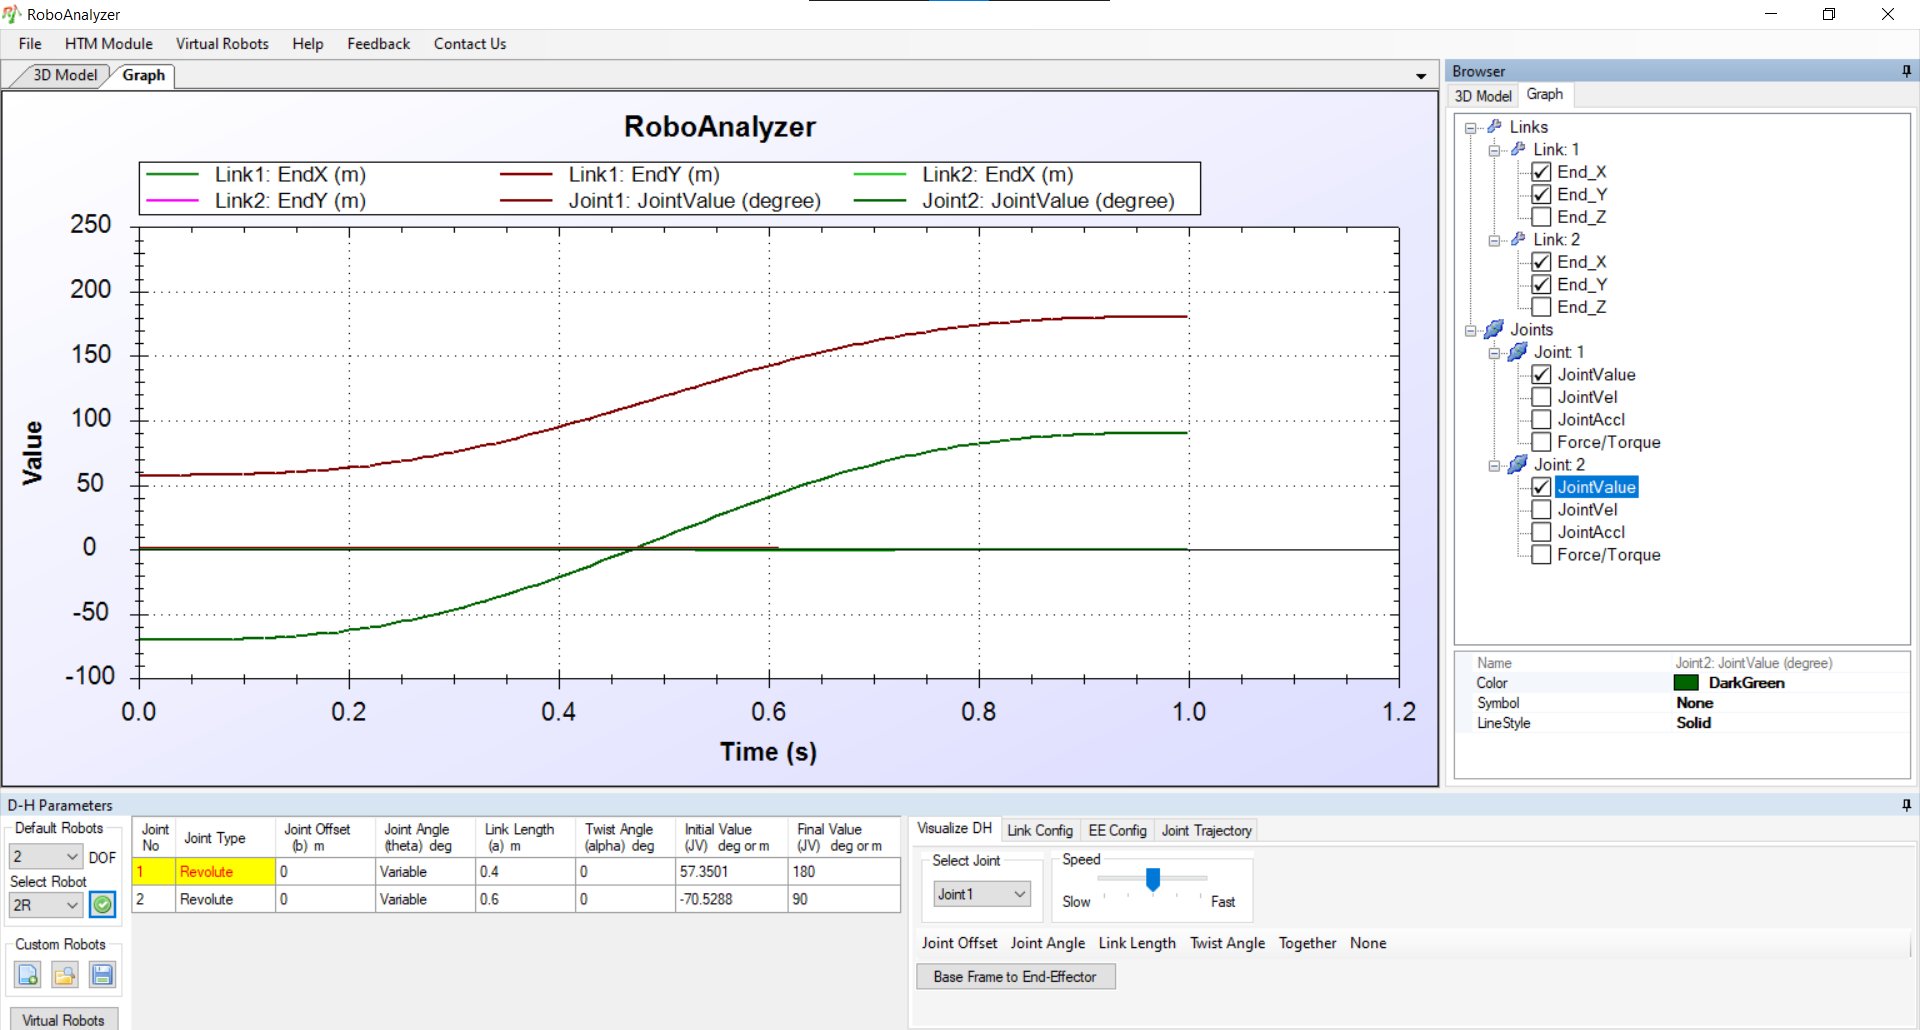

- joint value vs end effector position file

In [1]:
url = 'https://raw.githubusercontent.com/Atsurak/RIA_Lab/main/assets/'

In [2]:
import pandas as pd
data = pd.read_csv(url+'jointvalues.csv')
data.head()

frame   time  Link1: EndX (m)  Link1: EndY (m)  Link2: EndX (m)  \
0      1   0.00         0.215802         0.336793         0.800000   
1      2   0.01         0.215797         0.336796         0.800000   
2      3   0.02         0.215764         0.336817         0.799998   
3      4   0.03         0.215674         0.336875         0.799992   
4      5   0.04         0.215499         0.336987         0.799980   

   Link2: EndY (m)  Joint1: JointValue (degree)  Joint2: JointValue (degree)  \
0         0.200000                    57.350100                   -70.528800   
1         0.200022                    57.350907                   -70.527744   
2         0.200176                    57.356551                   -70.520357   
3         0.200594                    57.371850                   -70.500332   
4         0.201406                    57.401585                   -70.461414   

   Unnamed: 8  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN

- Analytical Solution for Inverse Kinematics

In [3]:
import math
r2d = 180/math.pi # convert radians to degrees
def inv_kinematics(x,y,l1,l2):
    c2 = (x*x+y*y-l1*l1-l2*l2)/(2*l1*l2)
    s2 = (1-c2*c2)**(1/2)
    theta21 = math.atan2(s2,c2)
    theta22 = math.atan2(-s2,c2)
    k1 = l1 + l2*c2
    k2 = l2*s2
    theta11 = math.atan2(y,x) - math.atan2(k2,k1)
    theta12 = math.atan2(y,x) - math.atan2(-k2,k1)
    return ((theta11*r2d,theta21*r2d),(theta12*r2d,theta22*r2d))

- verify joint value vs end effector for our modelled solution

In [4]:
sol1,sol2 = inv_kinematics(0.8,0.2,0.4,0.6)
print(sol1,sol2)

(-29.27761319035656, 70.5287793655093) (57.35010012620952, -70.5287793655093)


Which is same as that of the values obtained through roboanalyzer

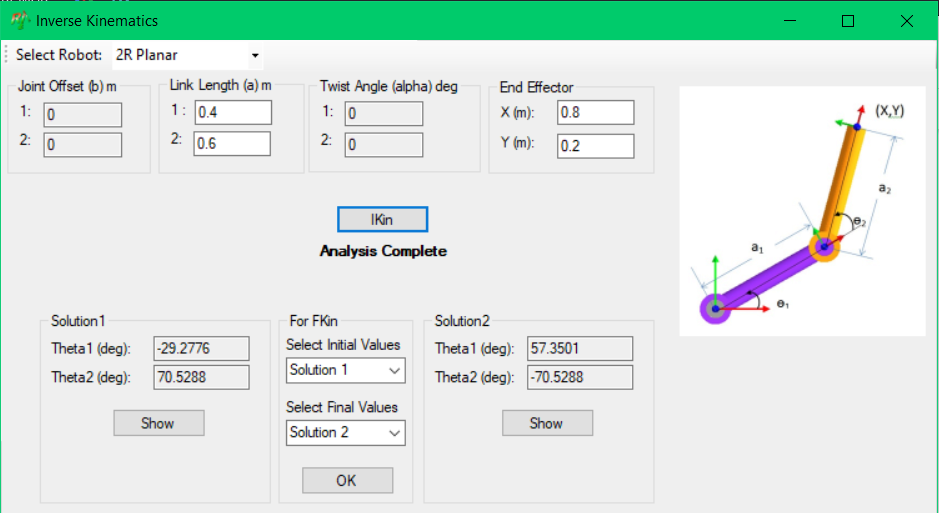

2. Perform the inverse dynamics for a 3R robot. Investigate the change in torque when the inertia properties and DH parameters are changed using Plots in Roboanalyzer. Change the input trajectory and observe the change. Write detailed observation using plots.

- The default values for DH parameters of a 3R robot are as shown here : 
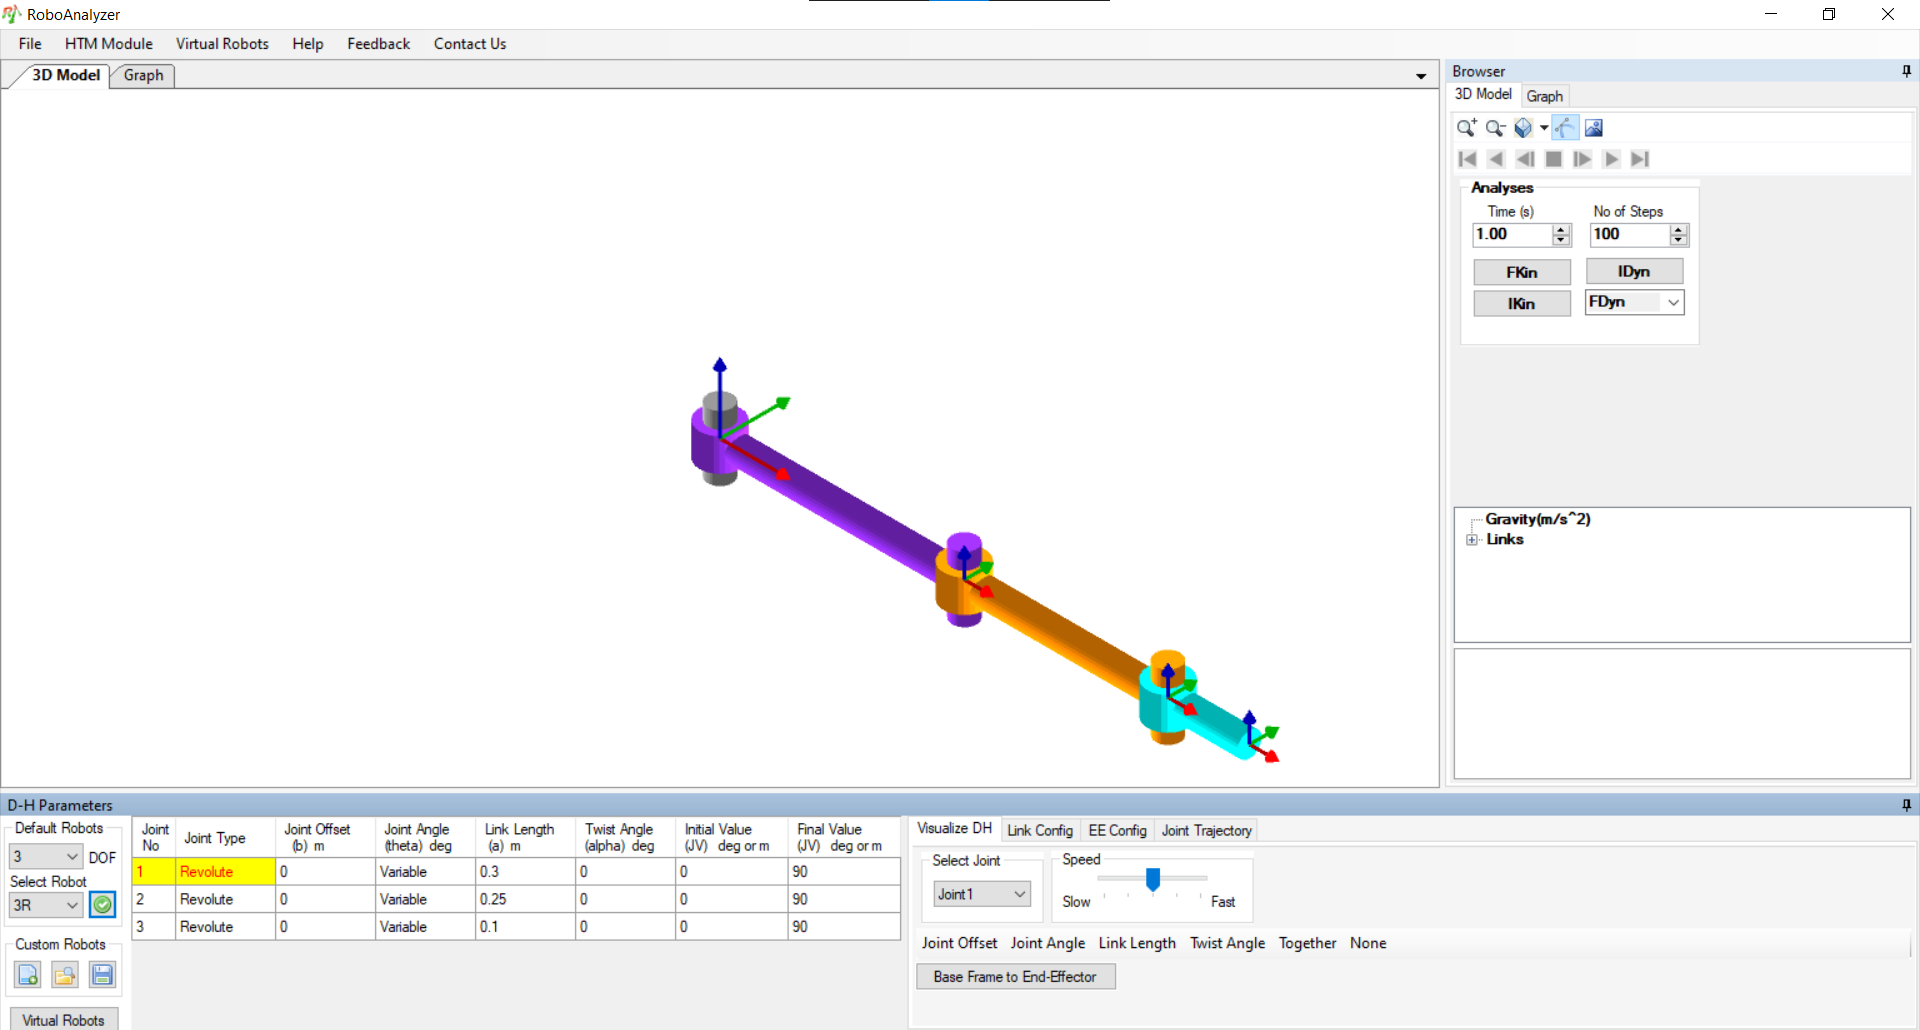

- performing inverse dynamics on this robot i.e " caluculating the torque required by the robot joint for performing the required motion.
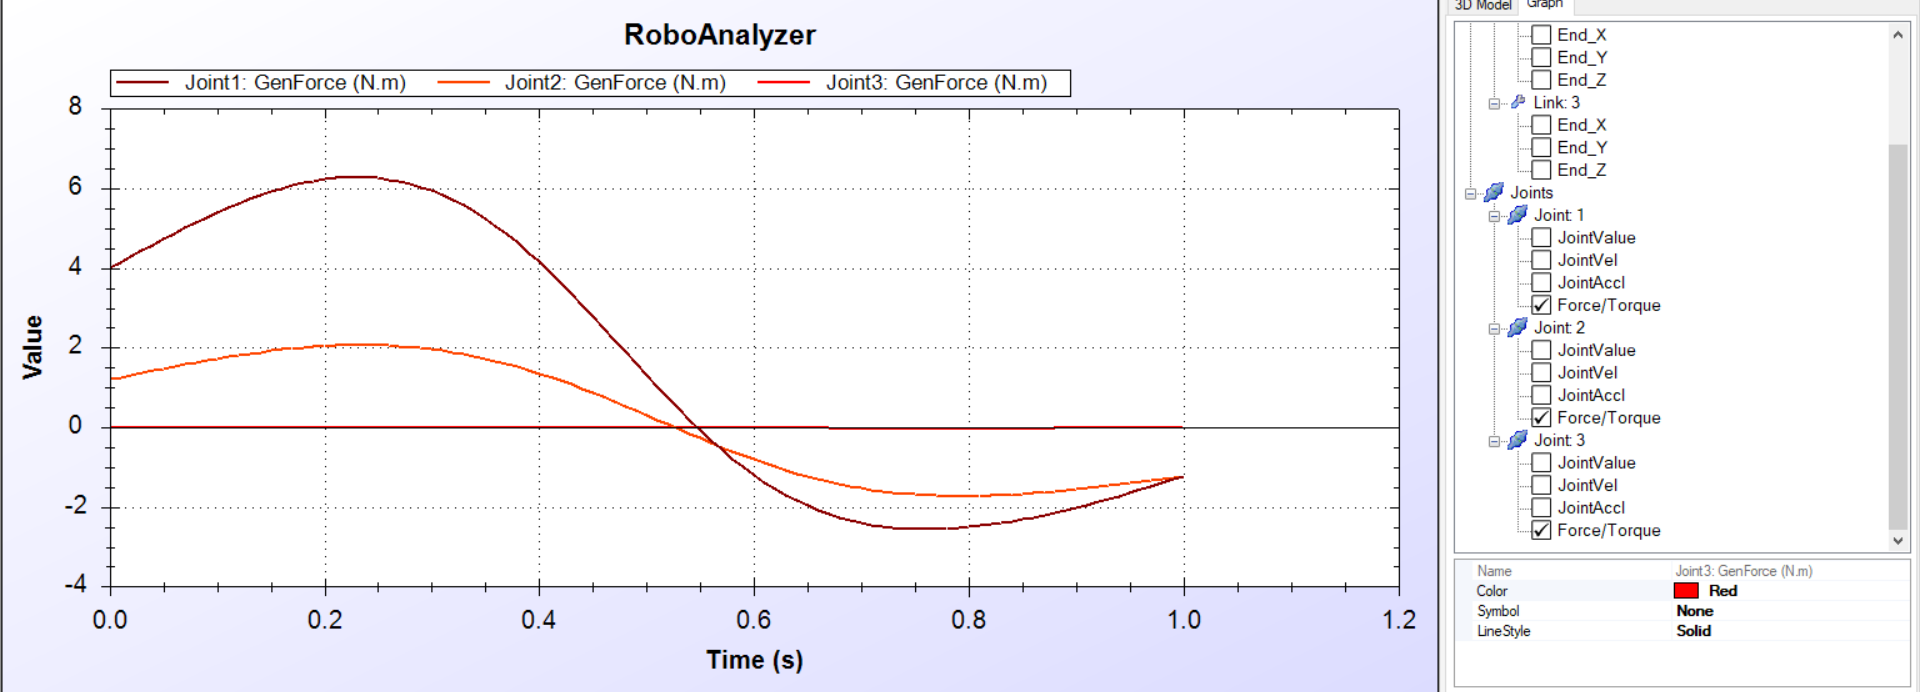

- changing the joint trajectory from the default(quintic) to cubic the new plot obtained after performing inv.dynamics is : 
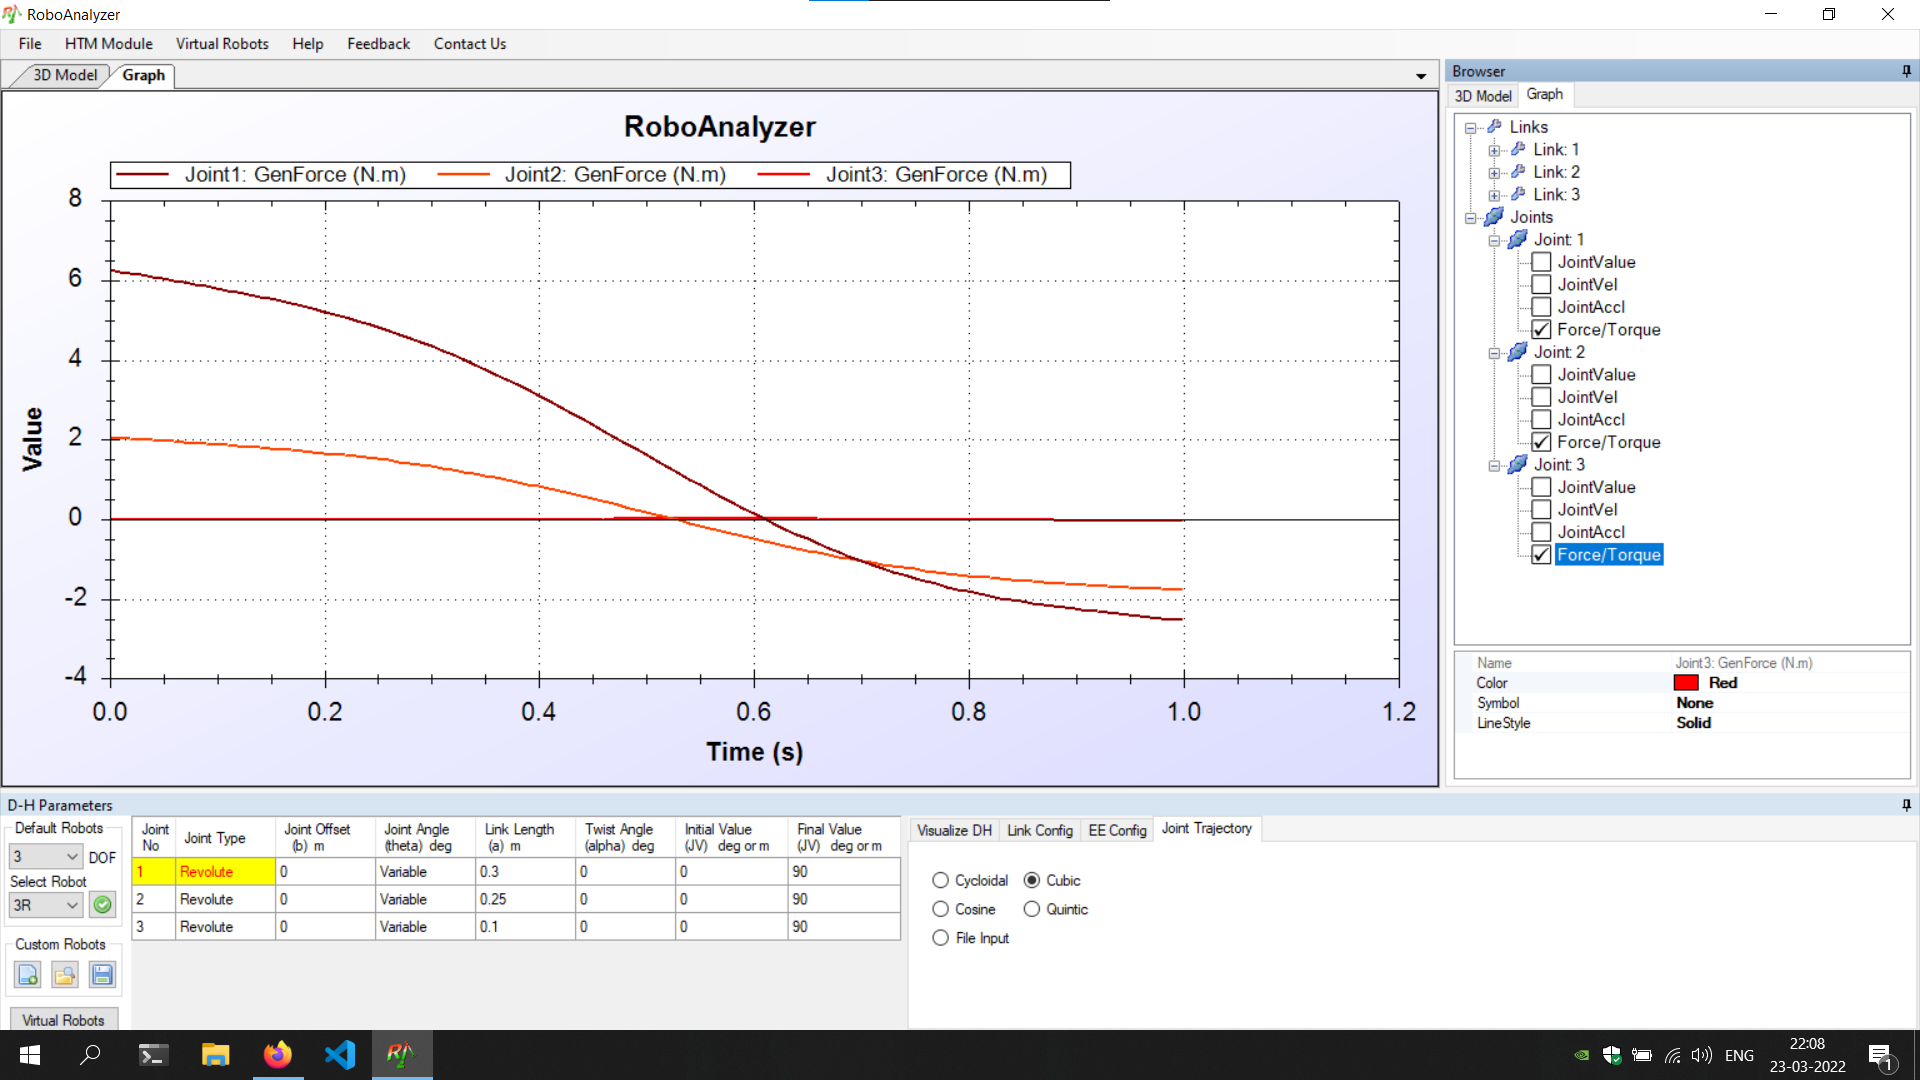

we can observe here that the Torque plots are very different for different trajectory's (we are limiting joint angle values of all joints in both trajectories to be between 0 to 90) with the torque required for 3rd joint remaining almost the same and the first joint requiring higher torque in case of cubic trajectory 

- change in torque when Inertia Properties are Changed for quintic trajectory

|Initial Mass|Change Mass(doubled) |
|-------|---------|
|Link 1 : 0.5|1.0|
|Link 2 : 0.4|0.8|
|Link 3 : 0.3|0.6|

- now performing inverse dynamics we get : 

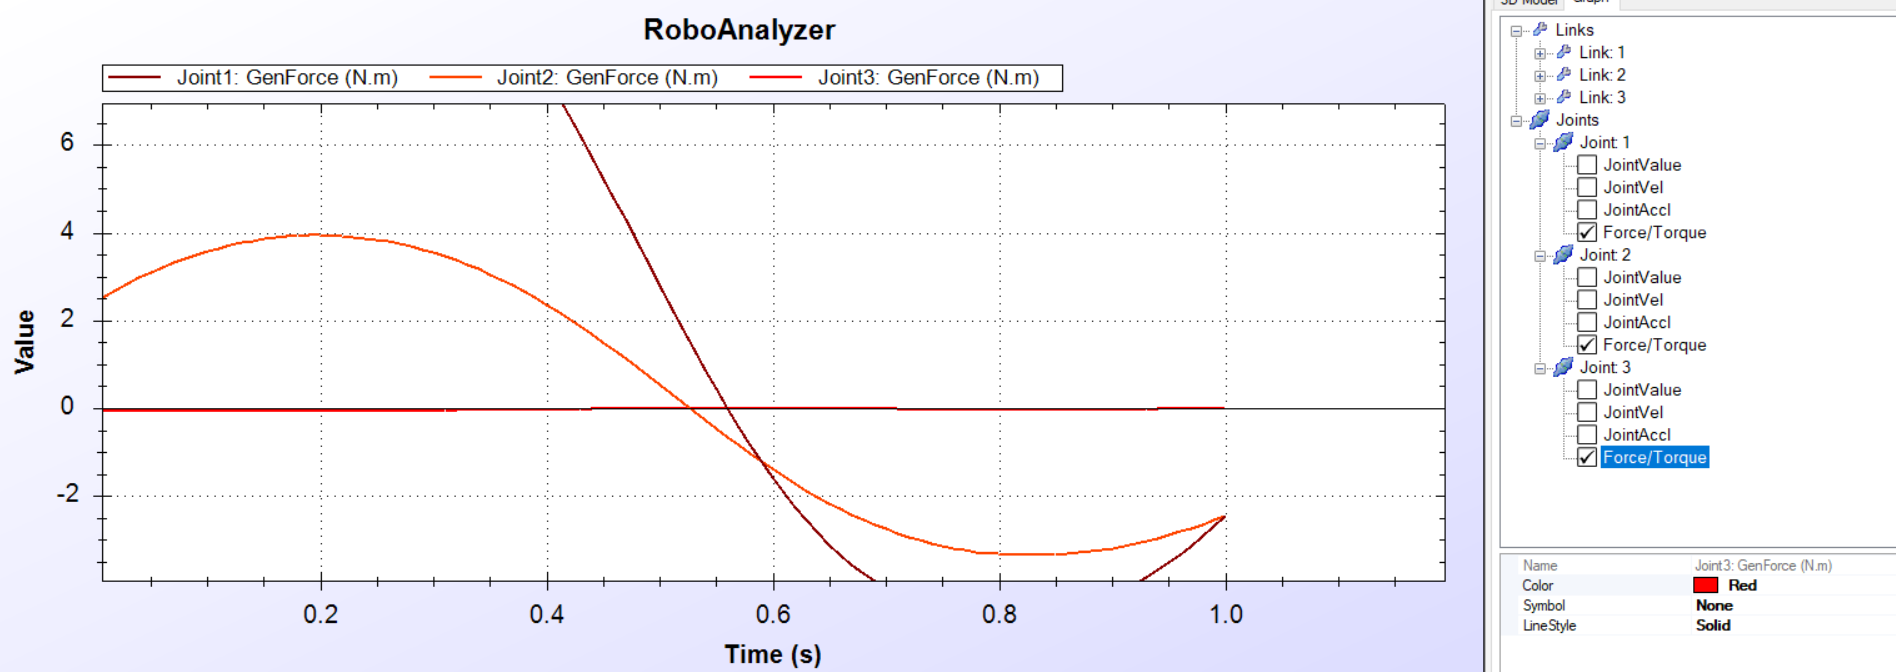

Here also the torque required by 1st joint is very high for initiation of motion (double as seen from csv file row 1)

- changing the DH parameters by doubling the link lengths and performing inverse dynamics we get : 
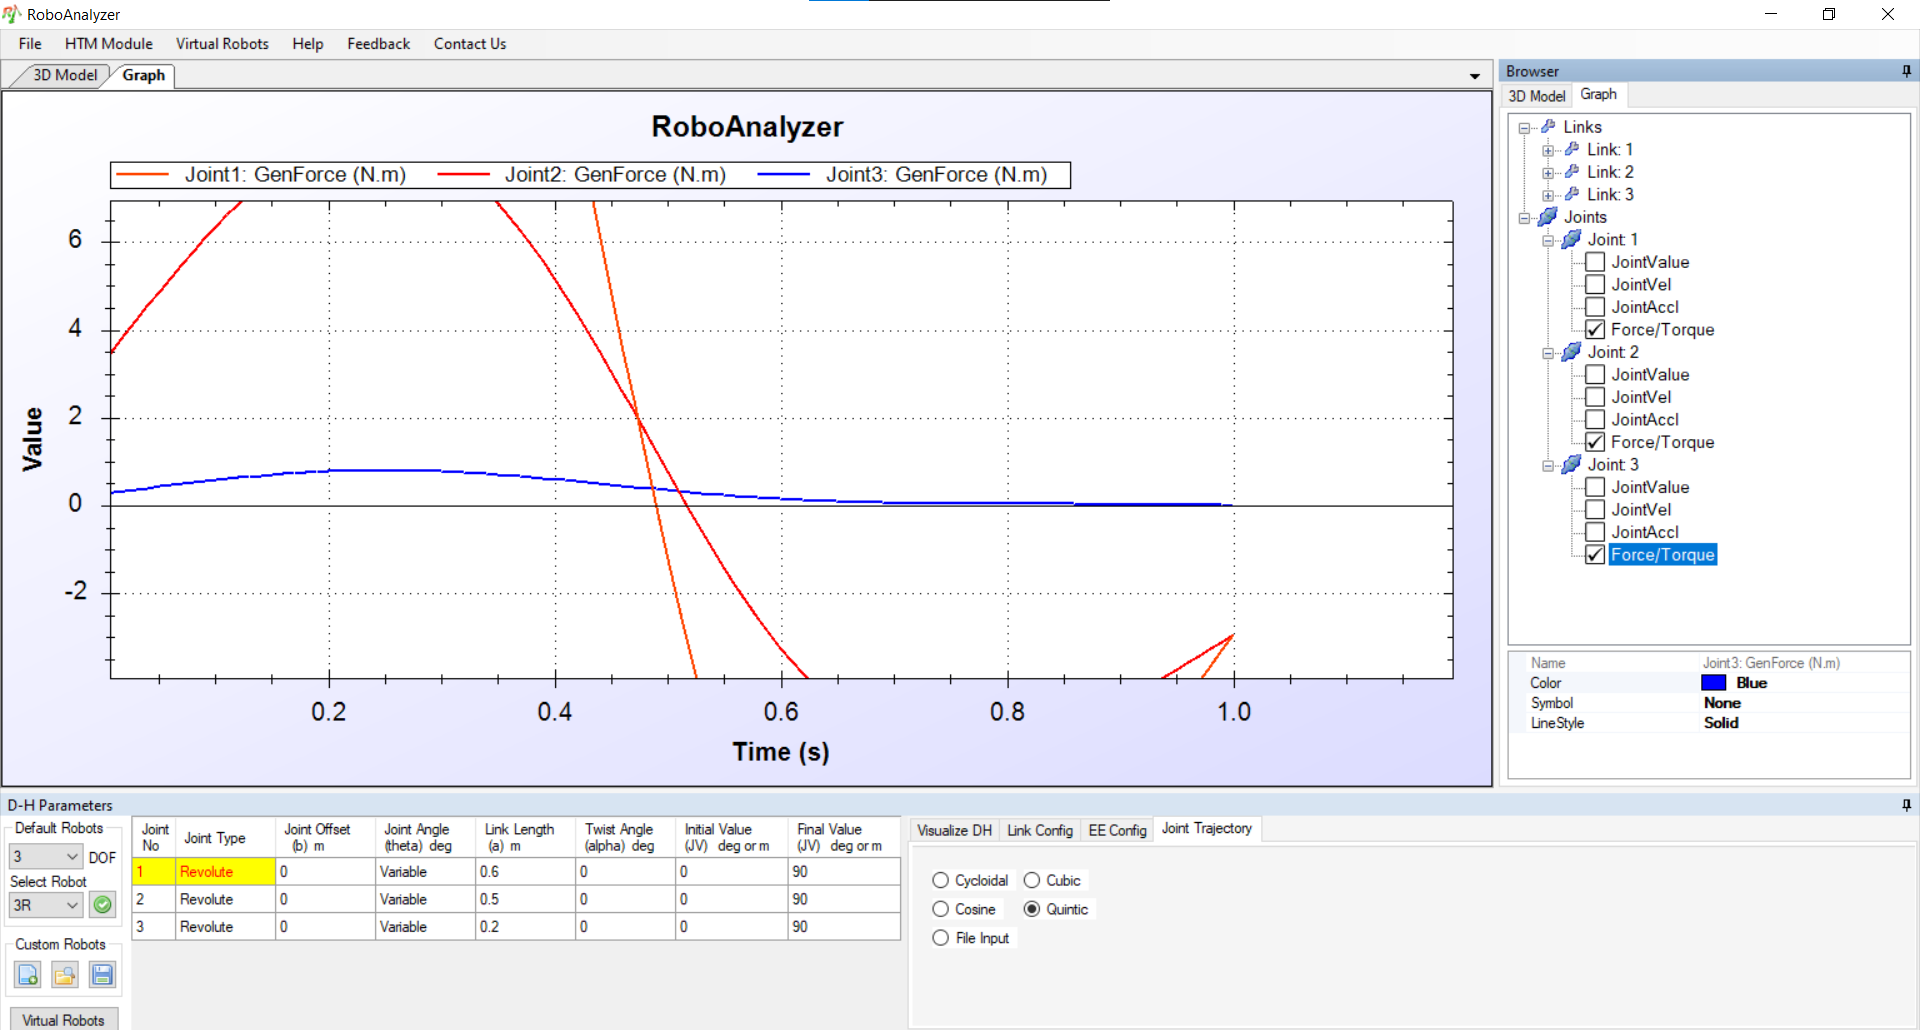

when link lengths are doubled the torque required is almost tripled

In [5]:
import pandas as pd
# Importing all csv files 
original = pd.read_csv(url+'original.csv') # original plot
params = pd.read_csv(url+'dhparameters.csv') # double link lengths (updated dh params)
inertia = pd.read_csv(url+'inertia.csv') # double link mass (updated inertia)
trajectory = pd.read_csv(url+'trajectory.csv') # change trajectory

In [6]:
original.head()

frame   time  Joint1: GenForce (N.m)  Joint2: GenForce (N.m)  \
0      1   0.00                3.992670                1.196820   
1      2   0.01                4.142041                1.253047   
2      3   0.02                4.290822                1.309052   
3      4   0.03                4.438426                1.364614   
4      5   0.04                4.584269                1.419513   

   Joint3: GenForce (N.m)  Unnamed: 5  
0               -0.029430         NaN  
1               -0.028612         NaN  
2               -0.027797         NaN  
3               -0.026989         NaN  
4               -0.026190         NaN

In [7]:
params.head()

frame   time  Joint1: GenForce (N.m)  Joint2: GenForce (N.m)  \
0      1   0.00                9.535320                3.207870   
1      2   0.01               10.345217                3.543311   
2      3   0.02               11.151917                3.877428   
3      4   0.03               11.952236                4.208902   
4      5   0.04               12.743012                4.536423   

   Joint3: GenForce (N.m)  Unnamed: 5  
0                0.264870         NaN  
1                0.298409         NaN  
2                0.331816         NaN  
3                0.364958         NaN  
4                0.397706         NaN

In [8]:
inertia.head()

frame   time  Joint1: GenForce (N.m)  Joint2: GenForce (N.m)  \
0      1   0.00                7.985340                2.393640   
1      2   0.01                8.415580                2.552442   
2      3   0.02                8.819744                2.701620   
3      4   0.03                9.198364                2.841370   
4      5   0.04                9.551969                2.971885   

   Joint3: GenForce (N.m)  Unnamed: 5  
0               -0.058860         NaN  
1               -0.059765         NaN  
2               -0.060616         NaN  
3               -0.061412         NaN  
4               -0.062156         NaN

In [9]:
trajectory.head()

frame   time  Joint1: GenForce (N.m)  Joint2: GenForce (N.m)  \
0      1   0.00                6.264324                2.051930   
1      2   0.01                6.218890                2.034828   
2      3   0.02                6.173438                2.017720   
3      4   0.03                6.127924                2.000593   
4      5   0.04                6.082279                1.983427   

   Joint3: GenForce (N.m)  Unnamed: 5  
0               -0.016989         NaN  
1               -0.017238         NaN  
2               -0.017487         NaN  
3               -0.017735         NaN  
4               -0.017981         NaN

3. Solve inverse dynamics for a 2 DOF robot usind Roboanalyzer. Download joint versus motion parameters csv file and validate it using analytical method. Give an analysis for both results.

- Inverse Kinematics of a 2DOF -- 2R Robot
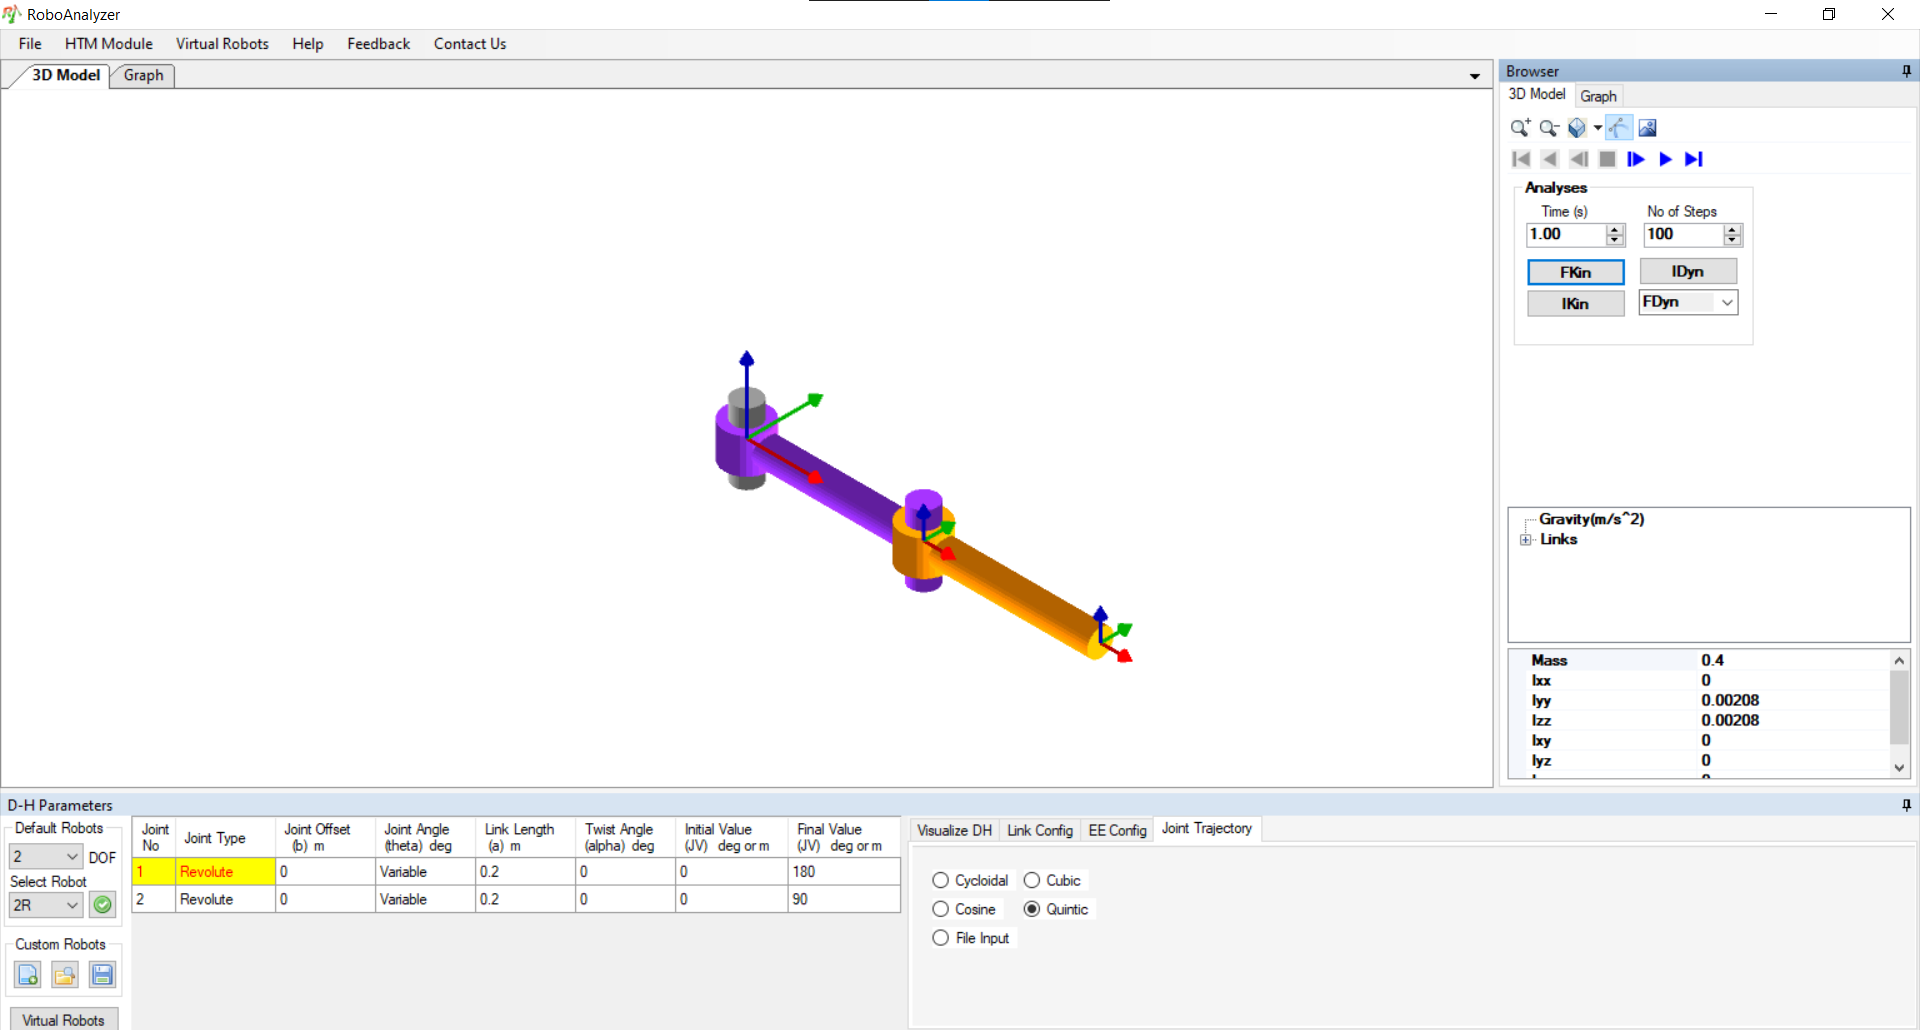

- using roboanalyzer

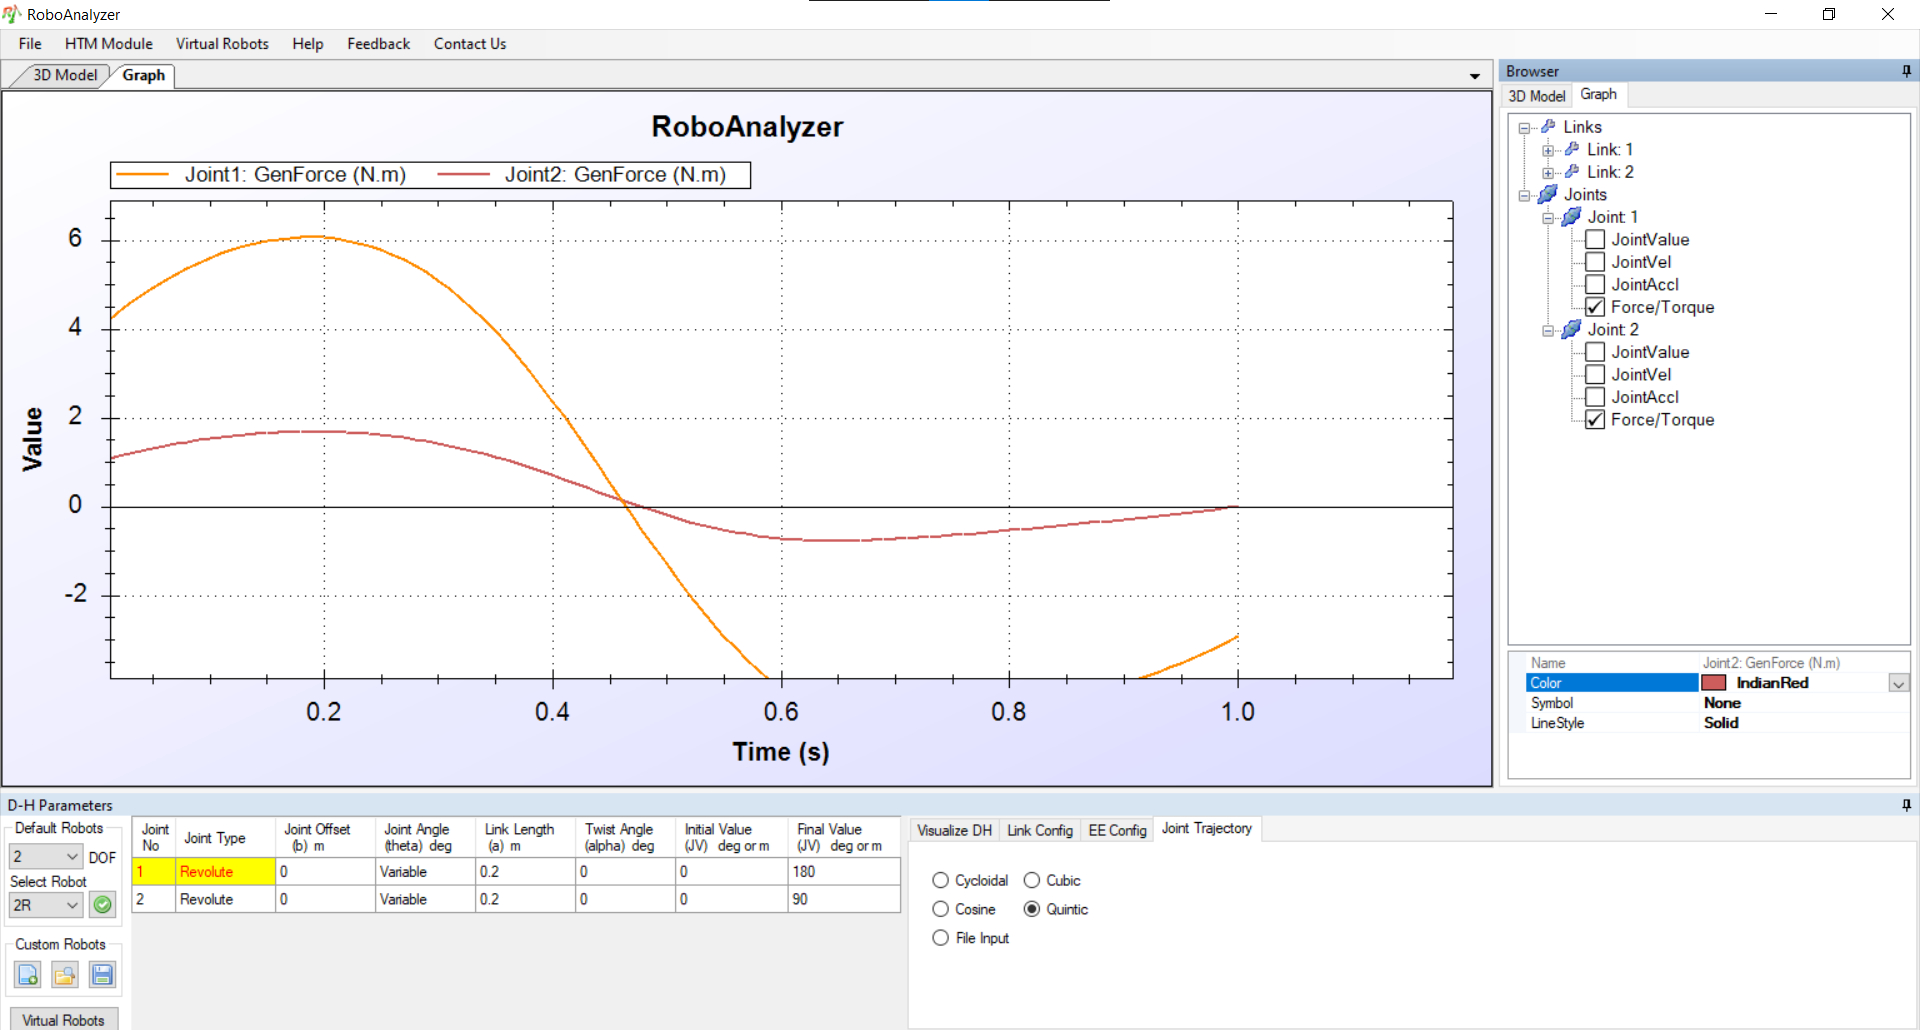

- csv file of motion parameters

In [10]:
motion = pd.read_csv(url+'motion.csv')
motion.head()

frame   time  Joint2: JointValue (degree)  Joint1: JointValue (degree)  \
0      1   0.00                     0.000000                     0.000000   
1      2   0.01                     0.000887                     0.001773   
2      3   0.02                     0.006986                     0.013971   
3      4   0.03                     0.023220                     0.046439   
4      5   0.04                     0.054199                     0.108399   

   Joint1: JointVel (degree/s)  Joint1: JointAccl (degree/s^2)  \
0                     0.000000                          0.0000   
1                     0.529254                        104.7816   
2                     2.074464                        203.2128   
3                     4.572774                        295.4232   
4                     7.962624                        381.5424   

   Joint2: JointVel (degree/s)  Joint2: JointAccl (degree/s^2)  Unnamed: 8  
0                     0.000000                          0.0000         NaN  
1                     0.264627                         52.3908         NaN  
2                     1.037232                        101.6064         NaN  
3                     2.286387                        147.7116         NaN  
4                     3.981312                        190.7712         NaN